<a href="https://colab.research.google.com/github/kungfumas/stbi/blob/master/Rasa_Initial_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rasa is Opensource Machine Learning framework used for developing AI based chatbot.**


In [13]:
!pip install rasa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Little Changes in Installtion**
1. upgrade table from 3.7.0 to 3.6.1
2. upgrade ipython to avoid crashing colab session, while doing restart the runtime.

After, installing ipython you saw a "RESTART RUNTIME" button in "ipython" cell output. 

Click on it to restart the runtime and you are good to go. 

No need to update anything run as usual.


In [14]:
!pip install -U tables==3.6.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
!pip install -U ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Click on above "RESTART RUNTIME" button**

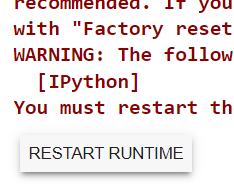

In [16]:
!python -m spacy download en

2022-12-04 08:00:43.541689: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
!pip install nest_asyncio==1.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import os
import rasa
import nest_asyncio

nest_asyncio.apply()
print("Event loop ready.")

Event loop ready.


In [19]:
from rasa.cli.scaffold import create_initial_project

In [20]:
project = "test-project"
create_initial_project(project)

In [21]:
# move into project directory and show files
os.chdir(project)
print(os.listdir("."))

['domain.yml', 'credentials.yml', 'actions', 'config.yml', 'endpoints.yml', 'tests', 'data']


In [22]:
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


### Sometime it may not run on first go. So, try to execute below line 3 time and it work fine. It is bug in rasa.

In [23]:
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

The configuration for pipeline and policies was chosen automatically. It was written into the config file at 'config.yml'.


/usr/local/lib/python3.8/dist-packages/rasa/utils/tensorflow/model_data.py:774: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.concatenate(np.array(f)),
Processed trackers: 100%|██████████| 3/3 [00:00<00:00, 127.95it/s, # action=12]
Processed actions: 12it [00:00, 541.07it/s, # examples=12]
Processed trackers: 100%|██████████| 2/2 [00:00<00:00, 133.07it/s, # action=5]
Processed actions: 5it [00:00, 935.77it/s, # examples=4]
Processed trackers: 100%|██████████| 120/120 [00:00<00:00, 725.30it/s, # action=30]
/usr/local/lib/python3.8/dist-packages/rasa/utils/tensorflow/model_data_utils.py:388: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecat

Your Rasa model is trained and saved at 'models/20221204-080056-daring-differential.tar.gz'.
TrainingResult(model='models/20221204-080056-daring-differential.tar.gz', code=0, dry_run_results=None)


In [ ]:
from rasa_nlu.training_data import load_data
from rasa_nlu import config
from rasa_nlu.model import Trainer

def train_nlu(data, configs, model_dir):
    training_data = load_data(data)
    trainer = Trainer(config.load(configs))
    trainer.train(training_data)
    model_directory = trainer.persist(model_dir, fixed_model_name = 'weathernlu')

if __name__ == '__main__':
    train_nlu('./data/data.json', 'config_spacy.json', '/content/test-project/models')

In [ ]:
from rasa.jupyter import chat

endpoints = 'endpoints.yml'

chat(model_path, endpoints)

In [ ]:
chat(model_path, endpoints)